**K-Means Clustering**

# Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exercise 1: Data Exploration and Preprocessing

1. Load the Dataset


In [62]:
cs = pd.read_csv('customer_segmentation.csv')

2. Data Exploration

In [63]:
print(cs.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [64]:
print(cs.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


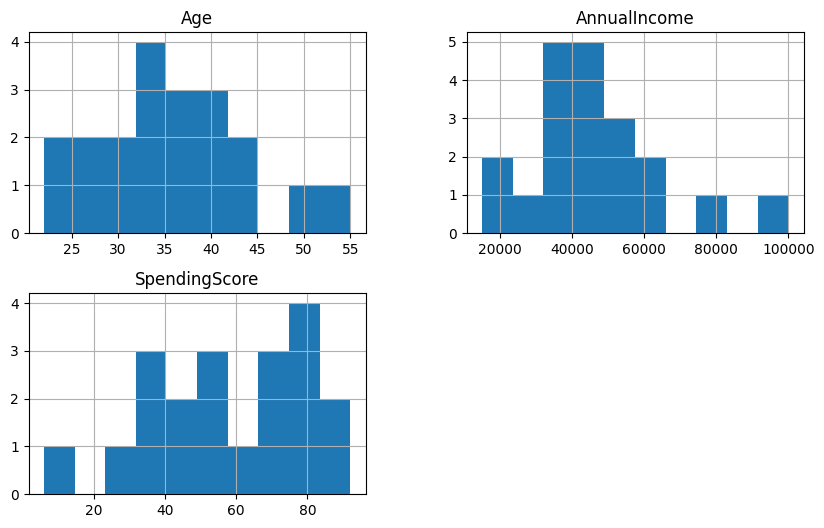

In [65]:
cs[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()

3. Data Normalization

In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cs[['Age', 'AnnualIncome', 'SpendingScore']])

cs_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(cs_scaled.head())

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


# Exercise 2: Implementing K-Means Clustering

1. Initial Model Implementation

In [67]:
km = KMeans(n_clusters=3, random_state=42)
cs['Cluster'] = km.fit_predict(cs_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2. Choosing Optimal k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

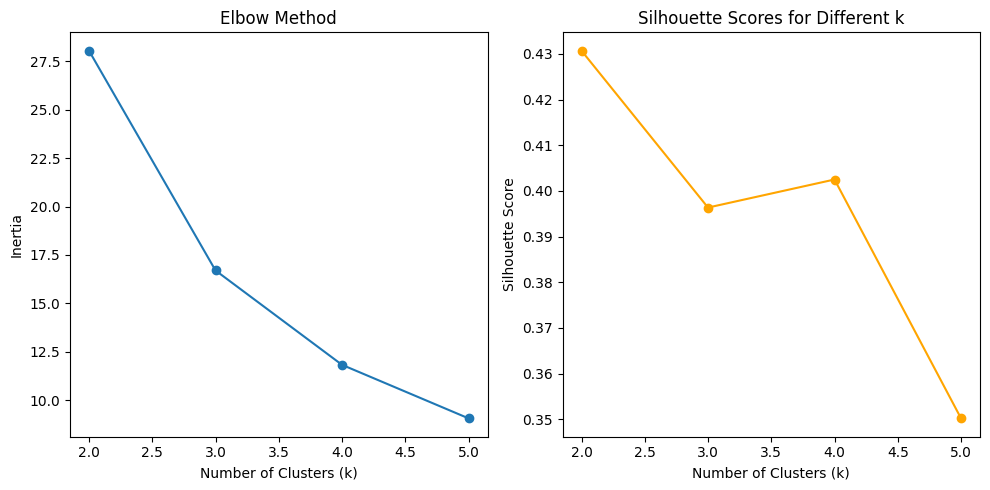

In [71]:
k_values = range(2, 6)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cs_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(cs_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')

plt.tight_layout()
plt.show()

3. Cluster Visualization

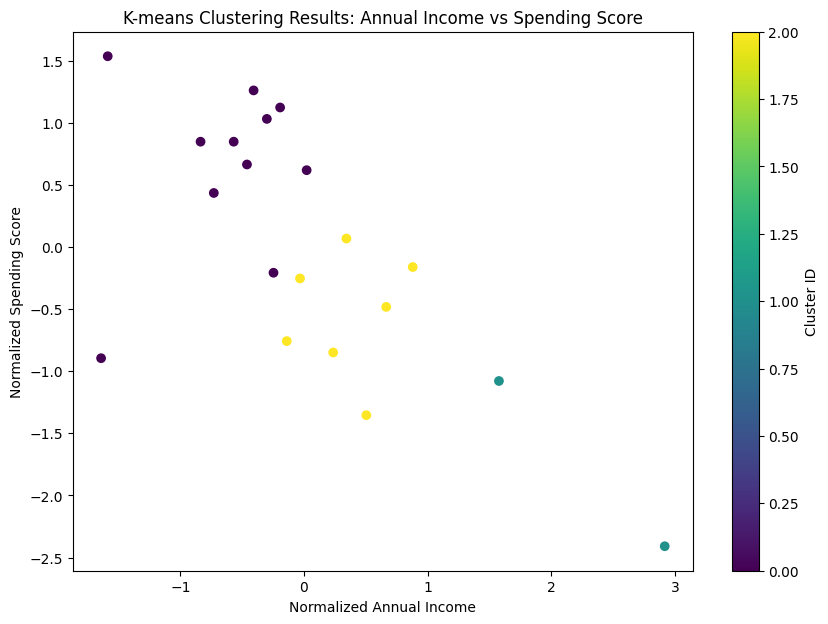

In [69]:
plt.figure(figsize=(10, 7))
plt.scatter(cs_scaled['AnnualIncome'], cs_scaled['SpendingScore'], c=km.labels_, cmap='viridis')
plt.title('K-means Clustering Results: Annual Income vs Spending Score')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.colorbar(label='Cluster ID')
plt.show()

# Exercise 3: Model Evaluation

1. Silhouette Score

k = 2 has the best clustering result as we can see it on the plot which k = 2 have the silhouette score, showing well-defined and separated clusters.

2. Cluster Analysis

**o Identify the characteristics of each cluster. For example:**


---


**▪ Which group tends to have the highest Annual Income?**

The group that belongs to the right side of the plot as they tend to have the highest income.

**▪ Which group has customers with the lowest Spending Score?**

The group that belongs to the bottom of the plot which shows that their spending score is low.

# **Exercise 4: Interpretation and Reporting**


1. Cluster Interpretation

I will explain the cluster by color by my own interpretation.

*   The purple cluster are those who spend more but does not have high annual income, we can interpret them as those who enjoy life's the most as they spend more than the others.
*   The Yellow cluster are those who spend on what they need, we can visualize that they have a spending score between high and low, as well as their annual income that is also in between, we can interpret them as those who spend money on what they mostly need and enjoy things that they already have and do not spend more.
*   The blue green cluster which have the highest annual income but lowest spending score, we can interpret them as the richest among all clusters but they spend lowest I think because of personal reason and life's contentment.





2. Report

The dataset was explored with different process used and  no missing values found. The optimal number of clusters was determined through inertia and silhouette scores. Each cluster have different characteristics and was interpreted already. The cluster can show how the rich stay rich and how the poor stay poor which can be related to real world.

3. Visualizations

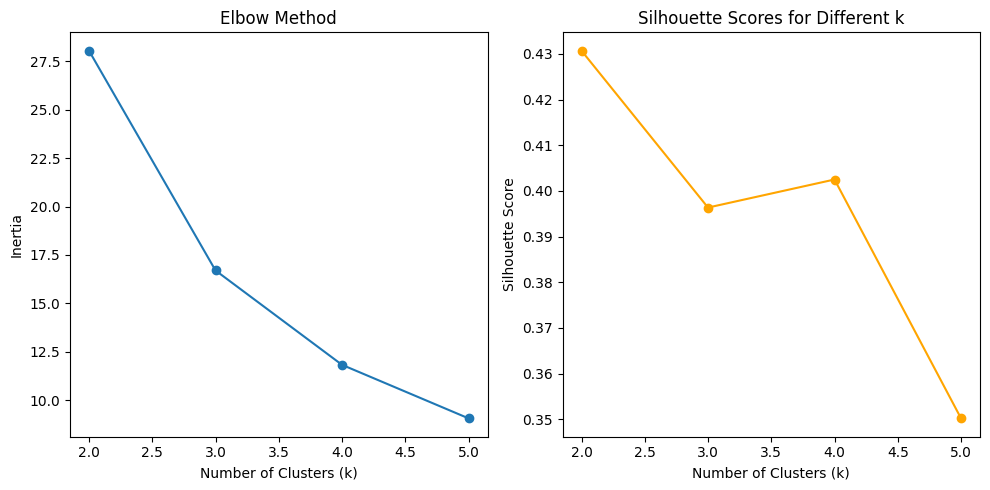

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')

plt.tight_layout()
plt.show()

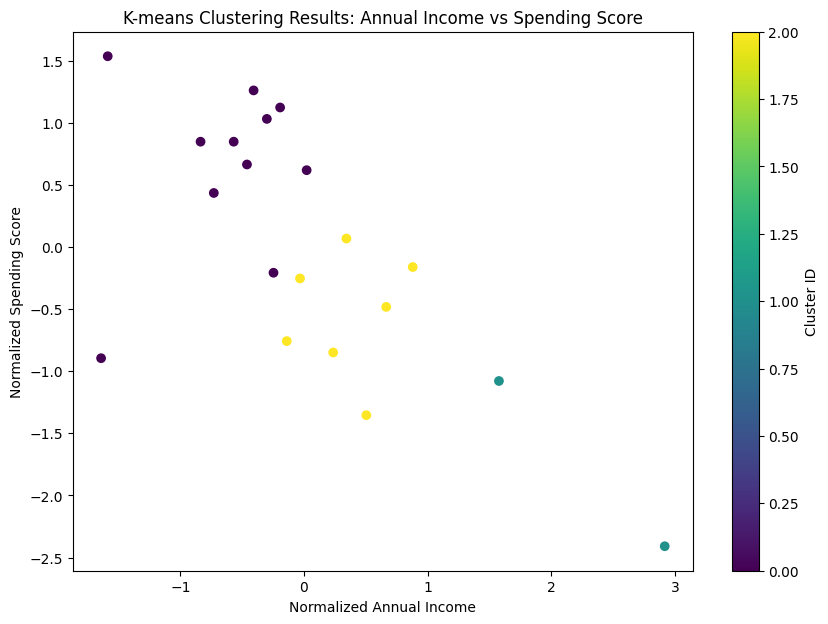

In [75]:
plt.figure(figsize=(10, 7))
plt.scatter(cs_scaled['AnnualIncome'], cs_scaled['SpendingScore'], c=km.labels_, cmap='viridis')
plt.title('K-means Clustering Results: Annual Income vs Spending Score')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.colorbar(label='Cluster ID')

plt.show()